# Esercitazione 3

Elisa Stabilini - 942529

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.special import erf
from numpy import exp
from numpy.lib.scimath import log, sqrt
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Nei due esercizi di seguito si simula l'evoluzione temporale di un *asset price*  in un dato intervallo di tempo, l'obiettivo è quello si calcolare il prezzo di un'opzione di *call* o di *put* europeo.

**Funzionamento opzioni europee**

* Il venditore dell'opzione, *writer*, concede all'acquirente, *holder*, il diritto di comprare (opzione di *call*) o vendere (opzione di *put*) un titolo, in un certo istante futuro $T$, ad un determinato prezzo d'esercizio $K$ (*strike price*)
* Al tempo $T$ l'acquirente decide se vendere o acquistare a seconda del profitto (indicato sotto) che ne ricaverebbe ($S(t)$ è il prezzo del titolo al tempo t)
    * *call*: $\max{\{0, S(T)-K\}}$
    * *put*: $\max{\{0, K-S(T)\}}$
* Al passare del tempo viene applicato un interesse con tasso $r$ (quindi il profitto si riduce di un fattore $e^{-rt}$)

Si pone quindi il problema per l'*holder* del prezzo a cui cedere tale diritto sul titolo, tenendo conto sia degli interessi che di possibili fluttuazioni del prezzo del sottostante.
IL modello più semplice per affrontare questo tipo di problema è quello di Black-Scholes che duppone un andamento dei prezzi secondo un moto broeniano geometrico.

Secondo questo modello si ha:
* Prezzo dell'opzione di *call*
    $$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
* Prezzo dell'opzione di *put*
    $$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$
   dove  
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

  dove $d_2 = d_1 - \sigma\sqrt{T-t}$, e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
  è la funzione cumulativa della gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
  e dove
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$  


## Esercizio 1

L'obiettivo è quello di mostarre che è possibile trovare una soluzione analitica dell'equazione di Black-Scholes utilizzando metodi Monte Carlo.
Infatti se il prezzo del sottostante $S(t)$ segue l'andamento di un moto browniano geometrico con *drift* $\mu$ e volatilità $\sigma$ la media eseguita su $M$ elementi fornirà il prezzo dell'opzione.
Entrambe le simulazioni sono state realizzate con $N=10^5$ passi suddivisi in $M=100$ blocchi.

In [2]:
#Risultati attesi - eq. Black-Scholes

def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

In [3]:
# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

call, put = black_scholes(S0, K, T, r, sigma)
attesi = [call,put]
print("***** BLACK-SCHOLES *****")
print("call: ", call)
print("put:  ", put)


***** BLACK-SCHOLES *****
call:  1.4975790778311286e+01
put:   5.4595325819072364


### Punto 1

In questo primo cosi i prezzi di *call* e *option* sono stati calcolati campionando direttamente i valori finali del prezzo di mercato $S(T)$ da una distribuzione browniana geometrica. 

La legge del moto browniano geometrico è riporatta di seguito
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    dove $W(t)\sim\mathcal{N}(0,t)$ - variabile distribuita secondo una distribuzione gaussiana e media nulla e varianza pari al tempo trascorso $t$.

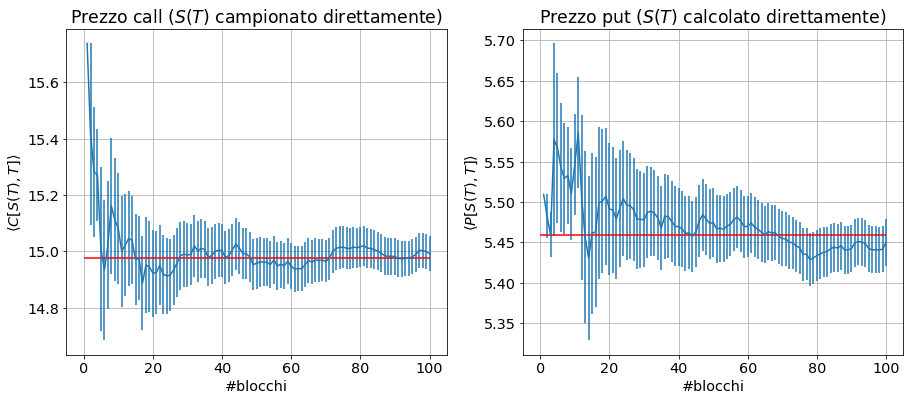

In [5]:
# Risultati da simulazione
fig, axs = plt.subplots(1,2,figsize=(15,6))

file = ["CallOptionPrice_1.dat","PutOptionPrice_1.dat"]
ordinate = [r'$\langle C[S(T),T] \rangle$',r'$\langle P[S(T),T] \rangle$']
title=[r"Prezzo call ($S(T)$ campionato direttamente)","Prezzo put ($S(T)$ calcolato direttamente)"]

for k in range(2):
    ax = axs.flat[k]

    media, sigma_media = np.loadtxt(file[k], usecols=(1,2), delimiter=' ', unpack='true')
    ax.set(xlabel='valore', ylabel='conteggi normalizzati')
    x = np.arange(len(media))+1
    ax.errorbar(x,media,yerr=sigma_media)
    ax.hlines(attesi[k],0,len(media),"red");
    ax.set(xlabel='#blocchi')
    ax.set(ylabel=ordinate[k])
    ax.set(title=title[k])
    ax.grid(True)

Utilizzando tutti gli $N$ blocchi si ottengono delle stime di $\langle C \rangle$ e $\langle P \rangle$ compatibili con i valori esatti calcolati con la formula analitica di Black-Scholes

In particolare: $\langle C \rangle = 14.99 \pm 0.06 $,       $\langle P \rangle = 5.45 \pm 0.03 $

### Punto 2

In questo secondo caso i prezzi di *put* e di *call* sono stati calcolati discretizzando la distribuzione di moto Browniano geometrico per $S(T)$, ovvero dividendo l'intervallo $[0,T]$ in $100$ sottointervalli. 

Di seguito è riportata la legge utilizzata
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    con $Z_i$ distribuita secondo una distribuzione nuormale a media nulla e varianza $1$ ($Z_i \sim \mathcal{N}(0,1)$).

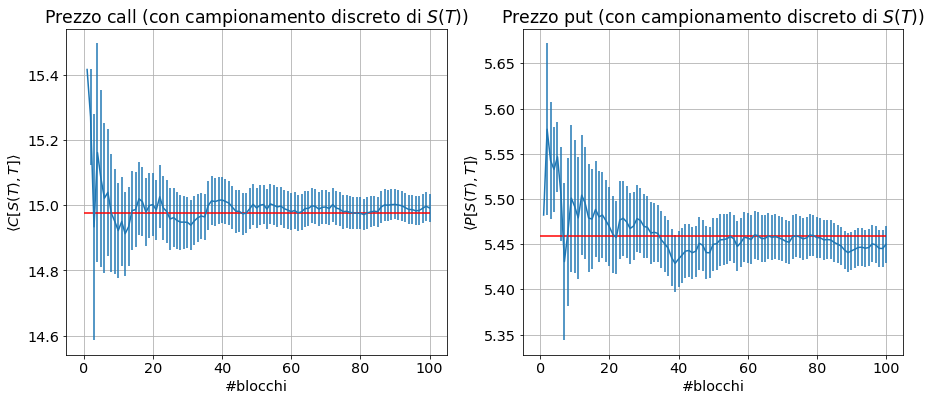

In [6]:
fig, axs = plt.subplots(1,2,figsize=(15,6))

file = ["CallOptionPrice_2.dat","PutOptionPrice_2.dat"]
ordinate = [r'$\langle C[S(T),T] \rangle$',r'$\langle P[S(T),T] \rangle$']
title=[r"Prezzo call (con campionamento discreto di $S(T)$)","Prezzo put (con campionamento discreto di $S(T)$)"]

for k in range(2):
    ax = axs.flat[k]

    media, sigma_media = np.loadtxt(file[k], usecols=(1,2), delimiter=' ', unpack='true')
    ax.set(xlabel='valore', ylabel='conteggi normalizzati')
    x = np.arange(len(media))+1
    ax.errorbar(x,media,yerr=sigma_media)
    ax.hlines(attesi[k],0,len(media),"red");
    ax.set(xlabel='#blocchi')
    ax.set(ylabel=ordinate[k])
    ax.set(title=title[k])
    ax.grid(True)

Utilizzando tutti gli $N$ blocchi si ottengono delle stime di $\langle C \rangle$ e $\langle P \rangle$ compatibili con i valori esatti calcolati con la formula analitica di Black-Scholes

In particolare: $\langle C \rangle = 14.99 \pm 0.04 $,       $\langle P \rangle = 5.45 \pm 0.02 $